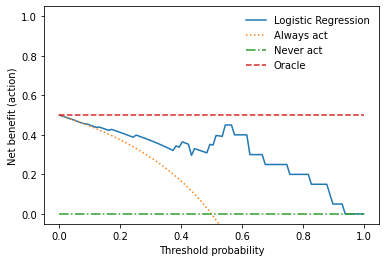

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from statkit.decision import NetBenefitDisplay

centers = [[0, 0], [1, 1]]
X_train, y_train = make_blobs(
    centers=centers, cluster_std=1, n_samples=20, random_state=5
)
X_test, y_test = make_blobs(
    centers=centers, cluster_std=1, n_samples=20, random_state=1005
)

clf = LogisticRegression(random_state=5).fit(X_train, y_train)
y_pred_base = clf.predict_proba(X_test)[:, 1]
NetBenefitDisplay.from_predictions(y_test, y_pred_base, name='Logistic Regression')

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

centers = [[0, 0], [1, 1]]
X_train, y_train = make_blobs(
    centers=centers, cluster_std=1, n_samples=20, random_state=5
)
X_test, y_test = make_blobs(
    centers=centers, cluster_std=1, n_samples=20, random_state=1005
)

baseline_model = LogisticRegression(random_state=5).fit(X_train, y_train)
tree_model = GradientBoostingClassifier(random_state=5).fit(X_train, y_train)

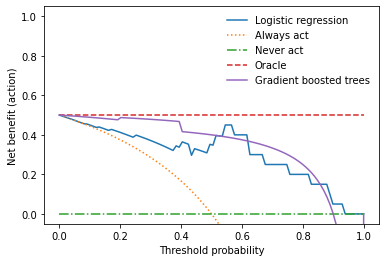

In [3]:
from statkit.decision import NetBenefitDisplay

y_pred_base = baseline_model.predict_proba(X_test)[:, 1]
y_pred_tree = tree_model.predict_proba(X_test)[:, 1]

NetBenefitDisplay.from_predictions(y_test, y_pred_base, name='Logistic regression')
NetBenefitDisplay.from_predictions(y_test, y_pred_tree, name='Gradient boosted trees', show_references=False, ax=plt.gca())
plt.savefig('../figures/demo_net_benefit_curve.png', bbox_inches='tight')

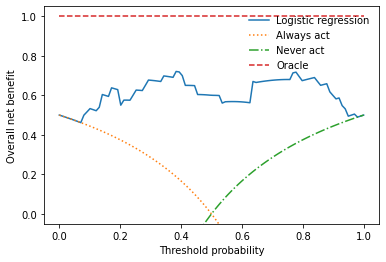

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statkit.decision import NetBenefitDisplay

X, y = make_blobs(n_features=2, centers=2, cluster_std=0.5, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

NetBenefitDisplay.from_predictions(y_test, y_pred, name='Logistic regression', benefit_type='overall')

plt.show()

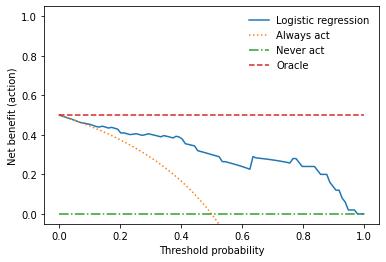

In [2]:
NetBenefitDisplay.from_predictions(y_test, y_pred, name='Logistic regression', benefit_type='action')

plt.show()

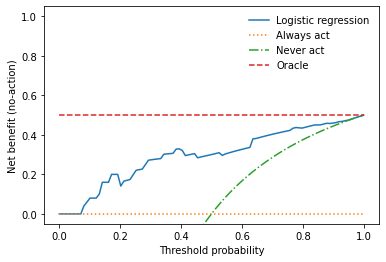

In [3]:
NetBenefitDisplay.from_predictions(y_test, y_pred, name='Logistic regression', benefit_type='noop')


In [2]:
from matplotlib import pyplot as plt
from numpy import argmax, argmin, array, divide, linspace
from numpy.testing import assert_almost_equal
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from statkit.decision import net_benefit, net_benefit_oracle, overall_net_benefit, NetBenefitDisplay


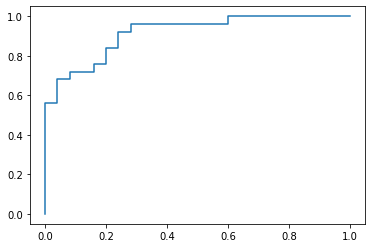

In [3]:
# The optimal net benefit point equals the slope of the ROC curve [1].
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [3]:
centers = [[0, 0], [0, 1]]
X, y = make_blobs(
    n_samples=1000,
    centers=centers,
    n_features=2,
    cluster_std=5,
    random_state=5,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
clf = LogisticRegression().fit(X_train, y_train)
# clf = DecisionTreeClassifier().fit(X_train, y_train)
# clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]


In [4]:
# thresholds_benefit, benefit = net_benefit(y_test, (y_pred > 0.5).astype(float))
thresholds_benefit, benefit = net_benefit(y_test, y_pred)
idx_nb = argmax(benefit)
threshold_max = thresholds_benefit[idx_nb]

In [5]:
print(threshold_max)

0.0


In [6]:
benefit[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
thresholds_benefit[-10:]

array([0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])

In [8]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,

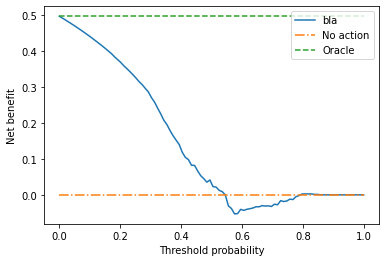

In [9]:
NetBenefitDisplay.from_predictions(y_test, y_pred, name='bla')

In [10]:
(tpr[1:] - tpr[:-1]) /( fpr[1:] - fpr[:-1])

NameError: name 'tpr' is not defined

In [ ]:
# The optimal net benefit point equals the slope of the ROC curve [1].
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
idx_roc = argmin(abs(thresholds_roc[1:] - threshold_max)) + 1
roc_slope = divide(tpr[1:] - tpr[:-1], fpr[1:] - fpr[:-1], where=tpr[1:] != tpr[:-1], out=np.zeros(len(tpr)-1))

plt.plot(fpr, tpr)

In [ ]:
from statkit.metrics import youden_j, youden_j_threshold

In [ ]:
y_test.mean()

In [ ]:
youden_j_threshold(y_test, y_pred)

In [12]:
def net_benefit_original(y_true, y_pred, threshold, mode="model", treated=True):
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    else:
        y_true = y_true.flatten()
    if isinstance(y_true, pd.Series):
        y_pred = y_pred.values
    else:
        y_pred = y_pred.flatten()

    N = len(y_true)
    TN = (y_pred == y_true) & (y_true == 0)
    TP = (y_pred == y_true) & (y_true == 1)
    FN = (y_pred != y_true) & (y_true == 1)
    FP = (y_pred != y_true) & (y_true == 0)

    if treated:
        if mode == "model":
            return sum(TP) / N - sum(FP) / N * threshold / (1 - threshold)
        elif mode == "oracle":
            return np.mean(y_true)
        elif mode == "all":
            return np.mean(y_true) - (1 - np.mean(y_true)) * threshold / (1 - threshold)
        elif mode == "none":
            return 0
    else:
        if mode == "model":
            return sum(TN) / N - sum(FN) / N * (1 - threshold) / threshold
        elif mode == "oracle":
            return 1 - np.mean(y_true)
        elif mode == "all":
            return 1 - np.mean(y_true) - np.mean(y_true) * (1 - threshold) / threshold
        elif mode == "none":
            return 0

In [13]:
import numpy as np
import pandas as pd


T = linspace(0, 1, 101)
nbs = []
for t in T:
    nb = net_benefit_original(y_test, (y_pred >= t).astype(int), t)
    nbs.append(nb)

/tmp/ipykernel_48517/114539078.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return sum(TP) / N - sum(FP) / N * threshold / (1 - threshold)


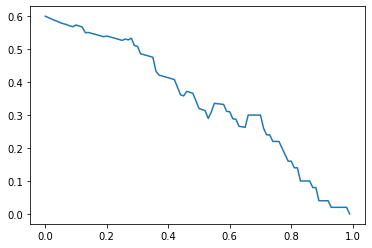

In [14]:
plt.plot(T, nbs)